# Importing and Cleaning Data before analysis 
It is rare that in data analysis that you would be given a data set that has no issues such as missing data or inaccurate columns or not enough data in a column. Becuase of this it is a standard practice to be able to look through the data and clean the data before running any analysis 

Importing data 
The most important part of the data analysis is actually getting the data into the file to be able to work with the data. But before we look at the getting the data into the file you need to look at some of the most comon file types that the data can be stored in 
There are three common types data will be given in 
- csv - comma seperated values 
- txt - text file 
- xlsx - Excel file 

When working with a txtx file you must inspet the data to make sure that there is a character seperatning each column such as a , - this means that it can be exported as a csv file

Using Pandas you can use read_csv adn read_excel respectivley for the file type. You must then pass in the file path to where the data you are trying to pull is from. This can either be a url to the raw data or a file path to the file. 

If you are running into issues, check the file path again or move the file to be in the same file space as the file you are working on. Another common issue is when workig with csv files, even though the name suggests that comma's are the thing that seperate the columns this is not always the case and sometimes you have to pass a second parameter into the read_csv file which is sep and set this to the character that is seperateing the columsn an example of this would be 

data = pd.read_csv('https://raw.githubusercontent.com/chroadhouse/Futureme/main/Data/titanic.csv', sep=';')

In [79]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np

#data is being imported using the url method meanning the data is being pulled from the web
data = pd.read_csv('https://raw.githubusercontent.com/chroadhouse/Futureme/main/Data/titanic.csv')

In [80]:
#Always run this when importing the data to make sure that the data has imported properly 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning the data 
Our goal here is to clean the data to ensure that data that is missing is filled and that any data that might be seen as incorrect is removed 

In [81]:
#The first thing to do is look at what data is missing using the .info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

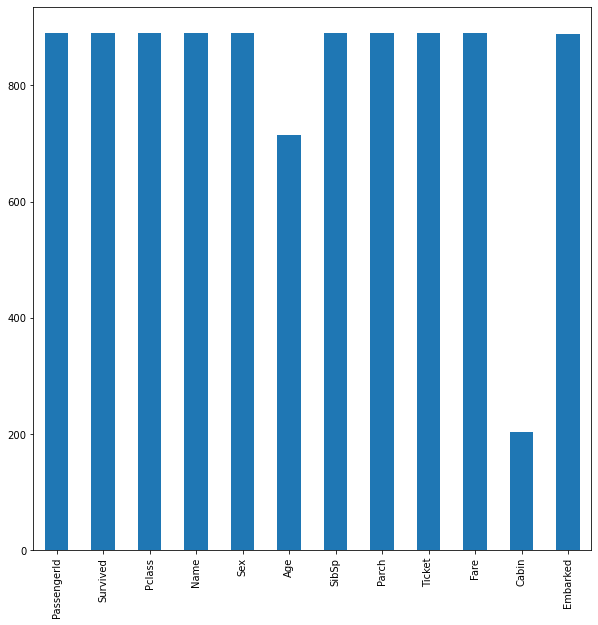

In [82]:
#We can also show this data in a graph form
data.isna().sum()

#Temporary way to see what data is missing in a graphical sense
temp1 = ~data.isna()
plt.figure(figsize=(10,10))
temp1.sum().plot(kind='bar')

In [83]:
#First start addressing the data by dropping the the cabin column 
#We want to get rid of this data since there is less than half of the data it would lead to innacuarate analysis
new_data = data.drop(columns='Cabin')

new_data.head()
#Cabin data is now removed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [84]:
#Now we look at filling in the missing data for the age column. 
#A common way to fill in numerical data is to fill it in with the mean of the current data

#Mean of age stored in this variable
mean_age = new_data['Age'].mean()
mean_age

29.69911764705882

In [85]:
#There are two main ways to then replace this data 

#This targets the nan and replaces it with the mean age - this method uses the numpy library
new_data['Age'] = new_data['Age'].replace(np.nan, mean_age)

#This method is specific for filling nan's 
new_data['Age'] = new_data['Age'].fillna(mean_age)

In [86]:
#Test if filling the data worked 
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [87]:
#Now we need to fill in the missing vales for the Embarked column - we want to replace with the most common category 
new_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [88]:
#So we want to replace with S 
new_data['Embarked'] = new_data['Embarked'].fillna('S')

In [89]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Converting continuous data to categorical data
Sometimes we want to change the way we represent our data. An example of this is changing the data from continuous to categorical. In the example below the Age column will be changed from the numbers to categories of young, adult and elder


In [90]:
#Thinking about moving this so that it would have a different outcome - need to get it to be an int before you want do anything else with it 
new_data['Age'] = new_data['Age'].astype(np.int64)

In [91]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [92]:
new_data['Age'] = pd.cut(new_data['Age'],bins=[0,17,65,99],labels=['Child','Adult','Elder'])

In [93]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,S
